In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
# Decision Tree Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [301]:
data = pd.read_csv('shopping_trends.csv')


In [302]:
data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


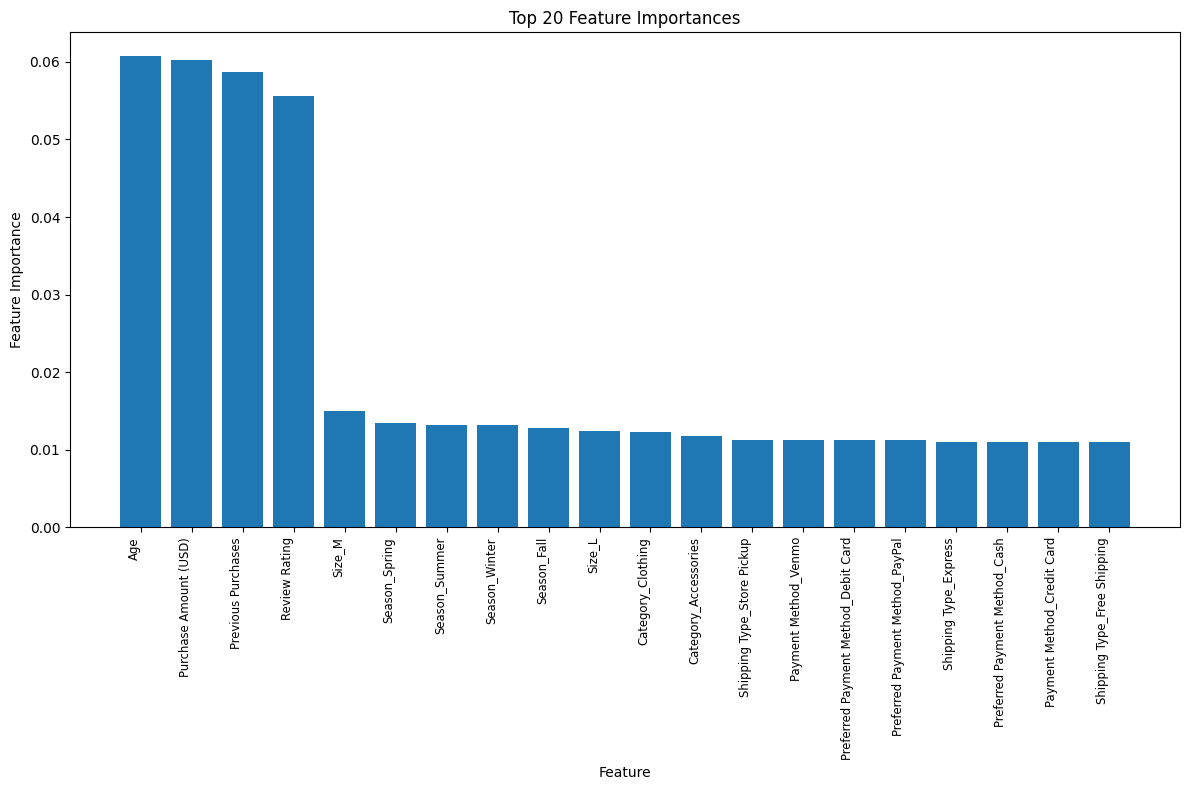

In [303]:
# Define the target variable and categorical columns
target_variable = 'Frequency of Purchases'
categorical_cols = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
    'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
    'Promo Code Used', 'Preferred Payment Method'
]

# Remove ID column if present
if 'Customer ID' in data.columns:
    data = data.drop(columns=['Customer ID'])

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.get_dummies(data.drop(columns=[target_variable]), columns=categorical_cols)

# Define the target variable
y = data[target_variable]

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_encoded, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sorting indices of feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plotting feature importances
# Plotting feature importances with improved x-axis label display
num_features = 20  # Number of features to display

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plt.bar(range(num_features), feature_importances[sorted_indices][:num_features], align="center")
plt.xticks(
    range(num_features), 
    X_encoded.columns[sorted_indices][:num_features], 
    rotation=90, 
    fontsize='small', 
    ha='right'
)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title(f"Top {num_features} Feature Importances")
plt.tight_layout()
plt.show()


#Age, Purchase Amount, Previos Pruchases and Review Rating are important

In [260]:
data.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [261]:
data.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [262]:
data.isna().sum() # no missing values



Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [263]:
data.duplicated().sum() # no duplicated values

0

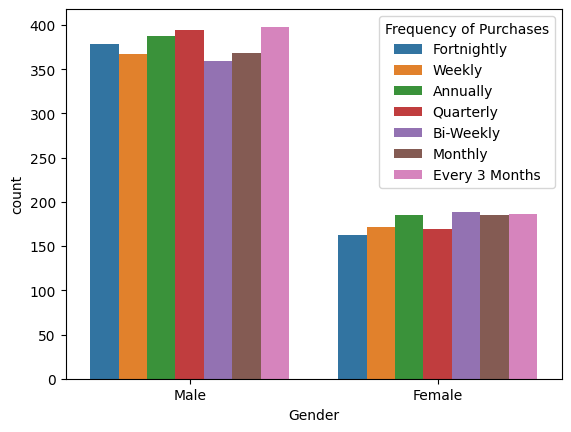

In [264]:
sns.countplot(x= "Gender", hue = "Frequency of Purchases", data = data)

plt.show()


In [265]:
data['Frequency of Purchases'] = data['Frequency of Purchases'].map( 
                   {'Fortnightly': "Yes" ,'Weekly': "Yes",'Bi-Weekly': "Yes",'Quarterly': "Yes", 'Monthly': "No",'Every 3 Months': "No",'Annually': "No"})


In [305]:
data


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


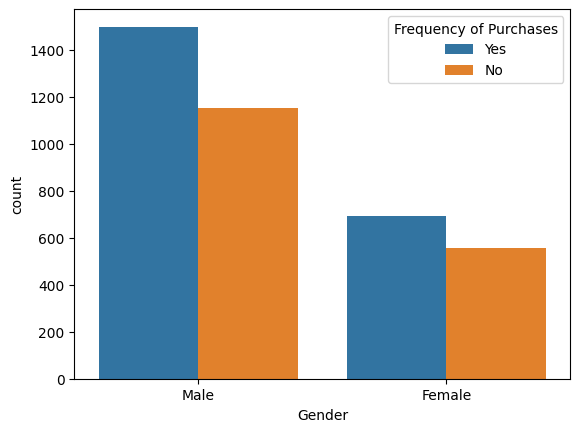

In [267]:
sns.countplot(x= "Gender", hue = "Frequency of Purchases", data = data)

plt.show() # people buying within a month are frequent purchasers otherwise not


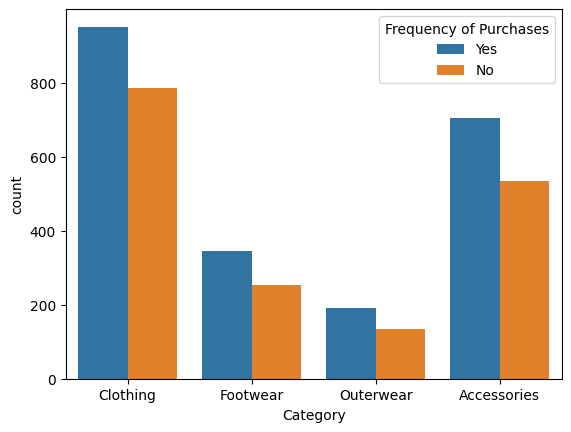

In [268]:
sns.countplot(x= "Category", hue = "Frequency of Purchases", data = data)
plt.show() # Clothing

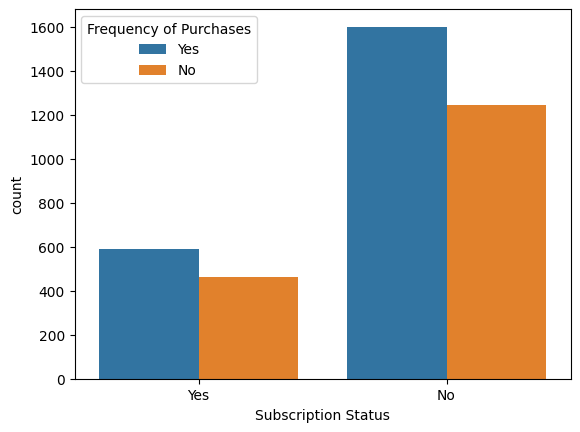

In [269]:
sns.countplot(x= "Subscription Status", hue = "Frequency of Purchases", data = data)
plt.show()

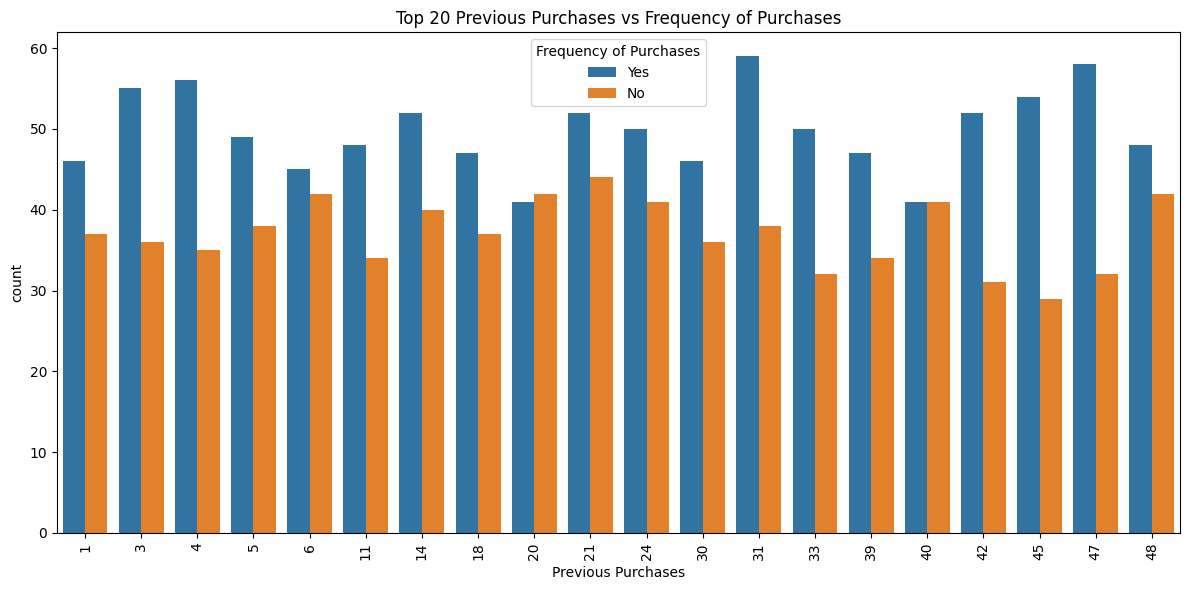

In [270]:
top_20_previous_purchases = data['Previous Purchases'].value_counts().nlargest(20).index

# Filter the data for the top 20 'Previous Purchases' values
filtered_data = data[data['Previous Purchases'].isin(top_20_previous_purchases)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="Previous Purchases", hue="Frequency of Purchases", data=filtered_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 20 Previous Purchases vs Frequency of Purchases')
plt.tight_layout()
plt.show()

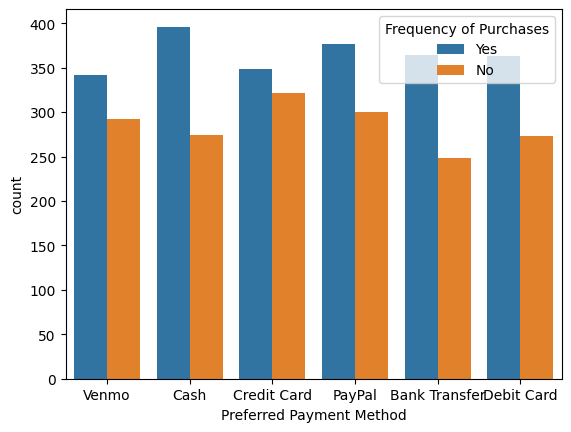

In [271]:
sns.countplot(x= "Preferred Payment Method", hue = "Frequency of Purchases", data = data)
plt.show()

In [272]:
bins = [0, 25, 50, 75, 100]
labels = ['0-25', '25-50', '50-75', '75-100']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)


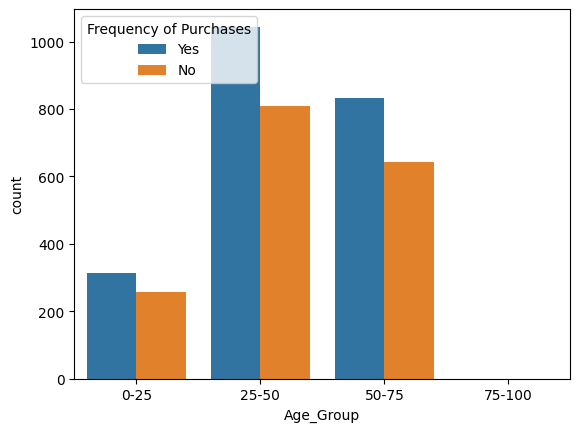

In [273]:
sns.countplot(x= "Age_Group", hue = "Frequency of Purchases", data = data)
plt.show()

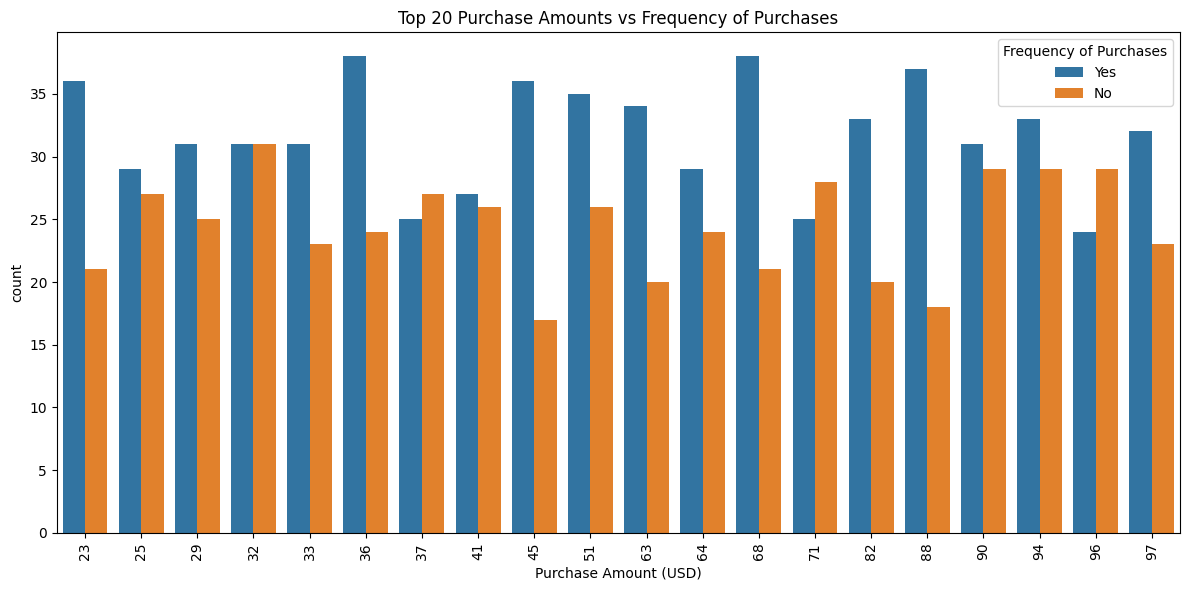

In [274]:
top_20_purchase_amount = data['Purchase Amount (USD)'].value_counts().nlargest(20).index

# Filter the data for the top 20 'Purchase Amount (USD)' values
filtered_data = data[data['Purchase Amount (USD)'].isin(top_20_purchase_amount)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x="Purchase Amount (USD)", hue="Frequency of Purchases", data=filtered_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 20 Purchase Amounts vs Frequency of Purchases')
plt.tight_layout()
plt.show()

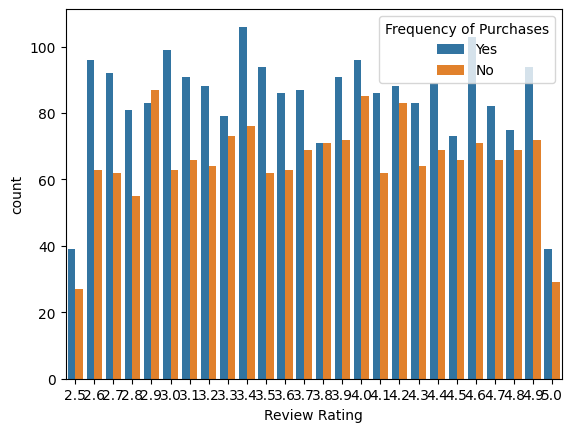

In [275]:
sns.countplot(x= "Review Rating", hue = "Frequency of Purchases", data = data)
plt.show() # drop

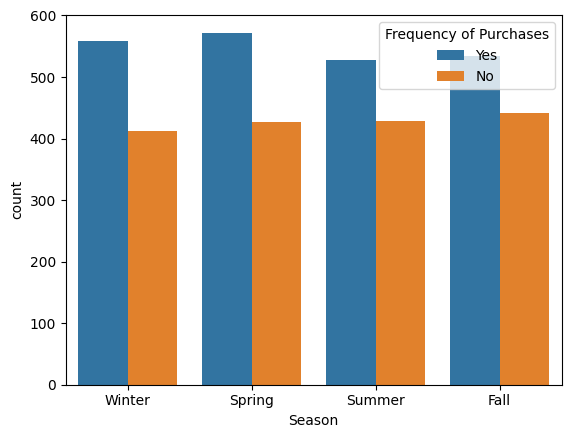

In [276]:
sns.countplot(x= "Season", hue = "Frequency of Purchases", data = data)
plt.show() # drop

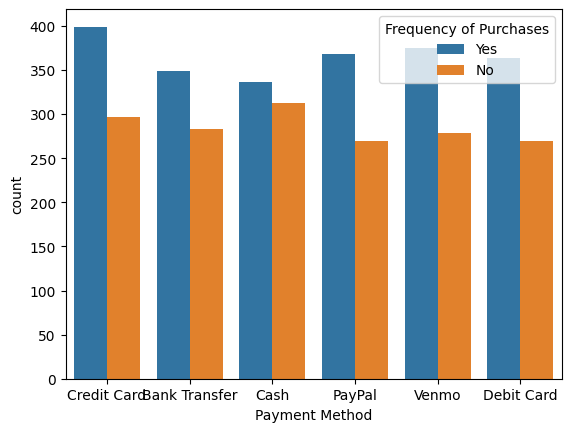

In [277]:
sns.countplot(x= "Payment Method", hue = "Frequency of Purchases", data = data)
plt.show() # drop

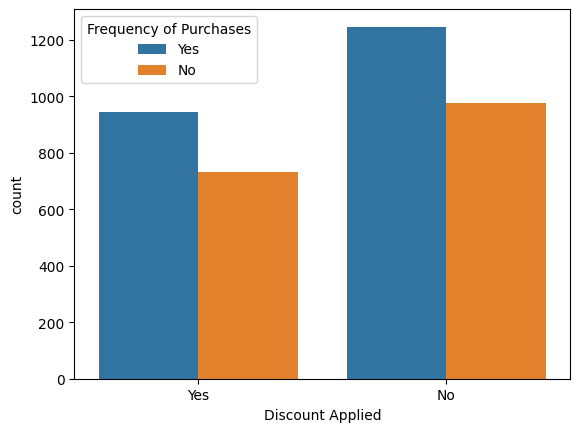

In [278]:
sns.countplot(x= "Discount Applied", hue = "Frequency of Purchases", data = data)
plt.show() # drop

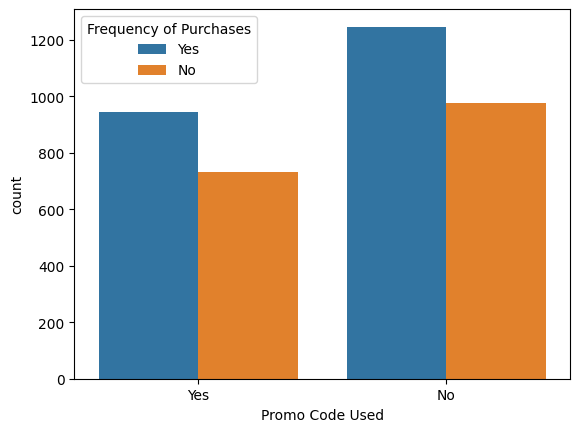

In [279]:
sns.countplot(x= "Promo Code Used", hue = "Frequency of Purchases", data = data)
plt.show() # drop

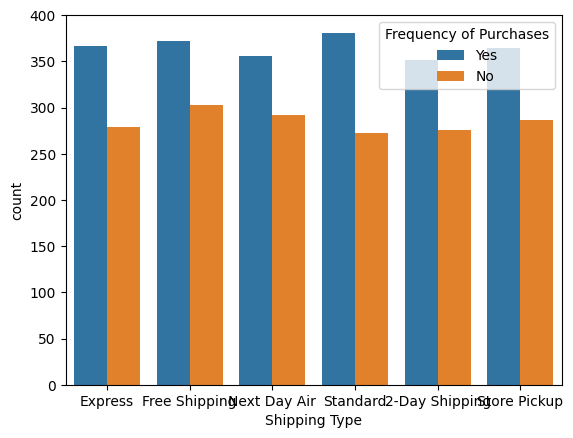

In [280]:
sns.countplot(x= "Shipping Type", hue = "Frequency of Purchases", data = data)
plt.show() # drop

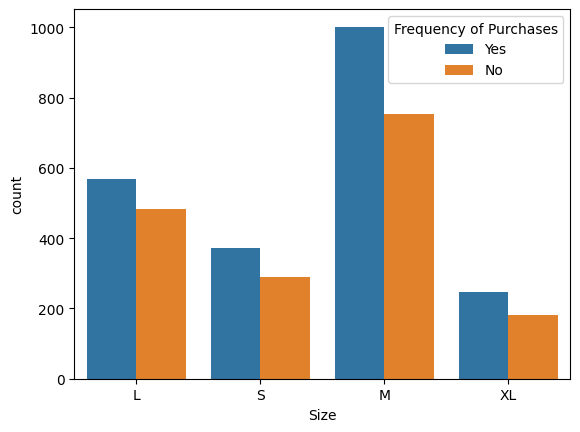

In [281]:
sns.countplot(x= "Size", hue = "Frequency of Purchases", data = data)
plt.show() # drop

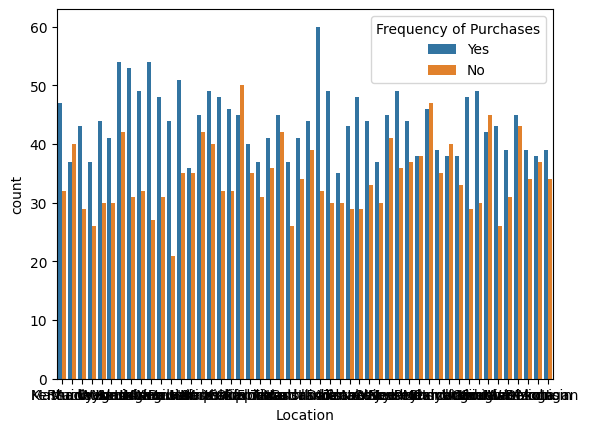

In [282]:
sns.countplot(x= "Location", hue = "Frequency of Purchases", data = data)
plt.show() # drop

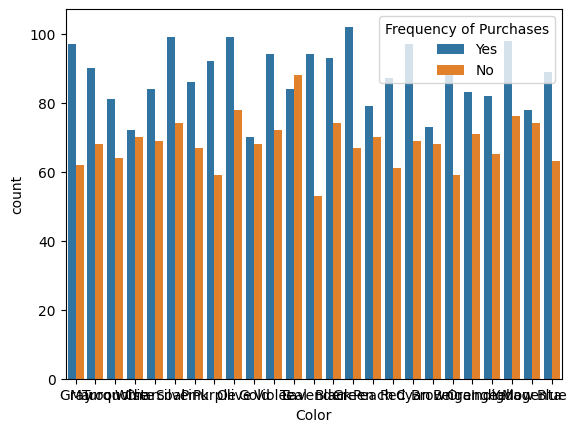

In [283]:
sns.countplot(x= "Color", hue = "Frequency of Purchases", data = data)
plt.show() # drop

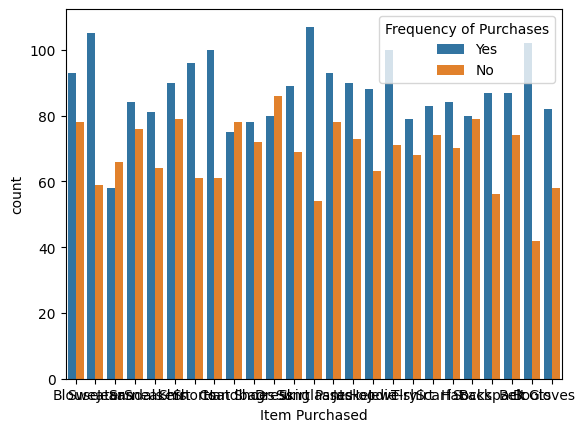

In [284]:
sns.countplot(x= "Item Purchased", hue = "Frequency of Purchases", data = data)
plt.show() # drop

In [285]:
data.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_Group'],
      dtype='object')

In [287]:
gender_map = {'Male': 0, 'Female': 1}

# Map the strings to integers using the mapping dictionary
data['Gender'] = data['Gender'].map(gender_map)


In [288]:
# Selecting specific columns to form a new DataFrame
new_data = data[['Frequency of Purchases', 'Age', 'Previous Purchases', 'Review Rating','Purchase Amount (USD)', 'Gender']]


In [289]:
data

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Group
0,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Yes,50-75
1,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Yes,0-25
2,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Yes,25-50
3,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Yes,0-25
4,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,No,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,1,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Yes,25-50
3896,52,1,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Yes,50-75
3897,46,1,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Yes,25-50
3898,44,1,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Yes,25-50


In [290]:
new_data

,Frequency of Purchases,Age,Previous Purchases,Review Rating,Purchase Amount (USD),Gender
0,Yes,55,14,3.1,53,0
1,Yes,19,2,3.1,64,0
2,Yes,50,23,3.1,73,0
3,Yes,21,49,3.5,90,0
4,No,45,31,2.7,49,0
...,...,...,...,...,...,...
3895,Yes,40,32,4.2,28,1
3896,Yes,52,41,4.5,49,1
3897,Yes,46,24,2.9,33,1
3898,Yes,44,24,3.8,77,1


In [291]:
# Define features and target variable
X = new_data.drop(columns=['Frequency of Purchases'])  # Features
y = new_data['Frequency of Purchases']  # Target variable
print(X)
print(y)

      Age  Previous Purchases  Review Rating  Purchase Amount (USD)  Gender
0      55                  14            3.1                     53       0
1      19                   2            3.1                     64       0
2      50                  23            3.1                     73       0
3      21                  49            3.5                     90       0
4      45                  31            2.7                     49       0
...   ...                 ...            ...                    ...     ...
3895   40                  32            4.2                     28       1
3896   52                  41            4.5                     49       1
3897   46                  24            2.9                     33       1
3898   44                  24            3.8                     77       1
3899   52                  33            3.1                     81       1

[3900 rows x 5 columns]
0       Yes
1       Yes
2       Yes
3       Yes
4        No
   

In [293]:
# Define features and target variable
X = new_data.drop(columns=['Frequency of Purchases'])  # Features
y = new_data['Frequency of Purchases']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Now proceed to fit the models and evaluate
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy:.2f}")
print(classification_report(y_test, dt_y_pred))

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_y_pred))


Decision Tree Classifier:
Accuracy: 0.53
              precision    recall  f1-score   support

          No       0.47      0.48      0.47       347
         Yes       0.58      0.57      0.57       433

    accuracy                           0.53       780
   macro avg       0.52      0.52      0.52       780
weighted avg       0.53      0.53      0.53       780


Random Forest Classifier:
Accuracy: 0.52
              precision    recall  f1-score   support

          No       0.45      0.36      0.40       347
         Yes       0.56      0.65      0.60       433

    accuracy                           0.52       780
   macro avg       0.51      0.51      0.50       780
weighted avg       0.51      0.52      0.51       780



In [294]:

# Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_y_pred = logistic_classifier.predict(X_test)

# Evaluate Logistic Regression Classifier
print("Logistic Regression Classifier:")
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
print(f"Accuracy: {logistic_accuracy:.2f}")
print(classification_report(y_test, logistic_y_pred))


Logistic Regression Classifier:
Accuracy: 0.55
              precision    recall  f1-score   support

          No       0.00      0.00      0.00       347
         Yes       0.55      1.00      0.71       433

    accuracy                           0.55       780
   macro avg       0.28      0.50      0.36       780
weighted avg       0.31      0.55      0.40       780



In [295]:
# Define features and target variable
X = new_data.drop(columns=['Frequency of Purchases'])  # Features
y = new_data['Frequency of Purchases']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate KNN Classifier
print("K-Nearest Neighbors Classifier:")
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, knn_y_pred))

K-Nearest Neighbors Classifier:
Accuracy: 0.49
              precision    recall  f1-score   support

          No       0.41      0.37      0.39       347
         Yes       0.54      0.58      0.56       433

    accuracy                           0.49       780
   macro avg       0.47      0.48      0.47       780
weighted avg       0.48      0.49      0.48       780



In [296]:
feature_columns = ['Age', 'Review Rating', 'Previous Purchases', 'Gender', 'Purchase Amount (USD)']

# X contains the selected features
X = new_data[feature_columns]

# y is the target variable
y = new_data['Frequency of Purchases']
classifier = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy across all folds
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.56410256 0.56153846 0.56153846 0.56153846 0.56153846]
Mean accuracy: 0.562051282051282
